##Are Names Becoming More or Less Androgynous##

I was sitting in a faculty meeting recently when a fellow teacher asked me whether or not I thought names in the modern era were becoming more or less androgynous. Not having any idea, I figured researching it would be a fun project to occupy my afternoon in meetings (a google search would also have answered the question, but where's the fun in that?).

Quick answer: yes, it looks like names are becoming quite a bit more androgynous.

You can find a link to the code and Jupyter notebook at github ### PUT IN REAL LINK HERE. All the data comes from the Social Security Administration's database of (almost) all baby names in the US from 1880. You can find it at: https://www.ssa.gov/oact/babynames/limits.html
As a note, the social security database has every child classified as male or female.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci

The data comes in a whole bunch of folders; I just put them in one DataFrame so they're easy to work with.

In [2]:
df = pd.DataFrame()

for filename in os.listdir('names'):
	if filename[0:3] == 'yob':
		year = filename[3:7]
		path = 'names/'+filename
		df2 = pd.read_csv(path,names=['Name','Sex','Number'])
		df2['Year'] = int(year)
		df = pd.concat([df, df2])

In [3]:
year_min = df['Year'].min()
year_max = df['Year'].max()

Next I just wrote a few futions so we can easily grab data by year, sex, or name.

In [4]:
def year(x, data = df):
    return data.loc[data['Year'] == x]

def sex(x, data = df):
    return data.loc[data['Sex'] == x]

def name(x, data = df):
    return data.loc[data['Name'] == x]

def top_names(yr, data = df, number = 10):
    a = sex('M')
    b = sex('F')
    top_10_M = year(yr, a)[0:number]
    top_10_F = year(yr, b)[0:number]
    return top_10_M, top_10_F

In [5]:
print top_names(1960)

(         Name Sex  Number  Year
7331    David   M   85928  1960
7332  Michael   M   84183  1960
7333    James   M   76842  1960
7334     John   M   76096  1960
7335   Robert   M   72369  1960
7336     Mark   M   58731  1960
7337  William   M   49354  1960
7338  Richard   M   43561  1960
7339   Thomas   M   39279  1960
7340   Steven   M   33895  1960,        Name Sex  Number  Year
0      Mary   F   51474  1960
1     Susan   F   39200  1960
2     Linda   F   37314  1960
3     Karen   F   36376  1960
4     Donna   F   34133  1960
5      Lisa   F   33702  1960
6  Patricia   F   32102  1960
7     Debra   F   26737  1960
8   Cynthia   F   26725  1960
9   Deborah   F   25264  1960)


Just for curiosity's sake:

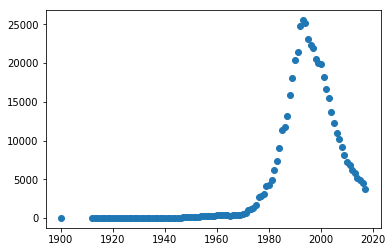

In [6]:
a = name('Zachary', sex('M'))
plt.scatter(a.Year, a.Number)

Lets make a list of male and female names which have ever been in the top x places.

In [7]:

def all_top_names(top = 100):
    male_names = sex('M', data = df)
    female_names = sex('F', data = df)
    nms_m = year(year_max, male_names)['Name'][0:top]
    nms_f = year(year_max, female_names)['Name'][0:top]
    for years in range(year_min, year_max):
        nms_m = nms_m.append(year(years, male_names)['Name'][0:top]) 
        nms_f = nms_f.append(year(years,female_names)['Name'][0:top])
    return nms_f.drop_duplicates().tolist(), nms_m.drop_duplicates().tolist()


In [8]:
temp = all_top_names(top=1)
print "Female", temp[0]
print "Male", temp[1]

Female ['Emma', 'Mary', 'Linda', 'Lisa', 'Jennifer', 'Jessica', 'Ashley', 'Emily', 'Isabella', 'Sophia']
Male ['Liam', 'John', 'Robert', 'James', 'Michael', 'David', 'Jacob', 'Noah']


It's a surprisingly small list of names that have ever held the #1 spot

Now the goal was to see if names are becoming more androgynous.  To make a numerical value for this, I've assigned a percent score to each name: Total number of female occurrences out of total number of occurrences; and then see how far this percent score is from 50 (which would be an even split).

0 = 100% of Names are assigned to 1 gender

50 = 50/50 split of Names

In [9]:
male_names = sex('M', data = df)
female_names = sex('F', data = df)

def is_androgynous(x):
    male_occurences = name(x, male_names).Number.sum()
    female_occurences = name(x, female_names).Number.sum()
    total = male_occurences+female_occurences
    return (50.0-np.absolute(50-(female_occurences)/float(total)*100))

In [10]:
print is_androgynous('Zach')
print is_androgynous('Sarah')
print is_androgynous('Harper')
print is_androgynous('Lee')
print is_androgynous('Riley')

0.0
0.308202169483
7.4086768525
21.2075482005
47.9108793308


We can see names like 'Zach' are give almost 100% of the time to males, and names like "Sarah" are given almost 100% of the time to female, so they have a distance of 50 or close to it from an even split.
"Harper" leans heavily female, but not exclusively.  Riley is pretty close to 50-50 (only 2% off)

There are a number of ways we can define whether or not names have become more androgynous.  To start, let’s just take the weighted average of the top 10 names given each year.

In [11]:
top =all_top_names(top = 500)

name_dict = {}
for i in top[0]:
    name_dict[i] = is_androgynous(i)
for i in top[1]:
    name_dict[i] = is_androgynous(i)

In [12]:

total_score_m = []
total_score_w = []
data_male = sex('M')
data_female = sex('F')


number = 10

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(men['Name'], men['Number']):
        total_score += name_dict[i]*j
        n += j
    total_score_m.append(total_score/n)

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(women['Name'], women['Number']):
        total_score += name_dict[i]*j
        n += j
    total_score_w.append(total_score/n)
   


        

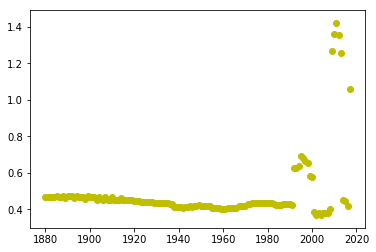

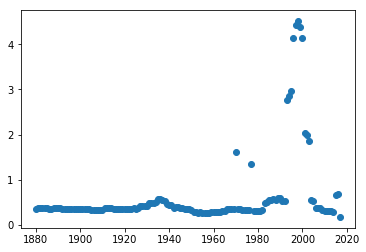

In [13]:
years = range(1880,2018)

plt.scatter((years), total_score_m, color = 'y')
plt.show()
plt.scatter((years), total_score_w)

In [14]:
print sci.pearsonr(years[0:110], total_score_m[0:110])

(-0.81316176356016656, 3.8616291359693862e-27)


Male:

When we look at the first hundred and ten years, there's actually a pretty strong negative correlation (correlation coefficient of -.81).  Names in the top ten were becoming consistently less androgynous until 1990.  However, in the last 90s, and again in the early 2000s, something popped up into the top 10 that heavily changed the data.  Let’s find out what name that was.


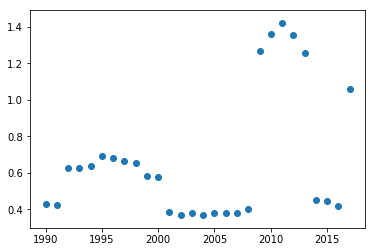

In [15]:
plt.scatter(range(1990,2018), total_score_m[-28:])

In [16]:
number = 10

for yr in range(1880, year_max+1):
    men = year(yr, data_male)[0:number]
    for i in men['Name']:
        if name_dict[i]>1:
            print yr, i, name_dict[i]

1992 Tyler 2.73367520229
1993 Tyler 2.73367520229
1994 Tyler 2.73367520229
1995 Tyler 2.73367520229
1995 Austin 1.10437455571
1996 Tyler 2.73367520229
1996 Austin 1.10437455571
1997 Austin 1.10437455571
1997 Tyler 2.73367520229
1998 Tyler 2.73367520229
1998 Austin 1.10437455571
1999 Tyler 2.73367520229
2000 Tyler 2.73367520229
2009 Jayden 9.421940034
2010 Jayden 9.421940034
2011 Mason 1.03221233247
2011 Jayden 9.421940034
2012 Mason 1.03221233247
2012 Jayden 9.421940034
2013 Mason 1.03221233247
2013 Jayden 9.421940034
2014 Mason 1.03221233247
2015 Mason 1.03221233247
2016 Mason 1.03221233247
2017 Logan 7.08178088348
2017 Mason 1.03221233247


It looks like in the 90s, the names Tyler and Austin came and went in the top 10.
In 2011, the name Jayden, with a 9.4% ranking (and Mason with a 1.03) started pushing up the total.
In 2017, Logan entered the top 10 with a 7.08%.



Female:

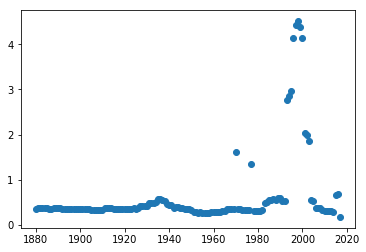

In [17]:
plt.scatter((years), total_score_w)

In [18]:
print sci.pearsonr(years[0:90], total_score_w[0:90])

(-0.12136868411036088, 0.25448301821697905)


Very little correlation at all for the first 90 years; little bounce in the 30s.  But in about 1970, a few names start popping up that alter the score.

In [39]:
number = 40

for yr in range(1880, year_max+1):
    female = year(yr, data_female)[0:number]
    for i in female['Name']:
        if name_dict[i]>2:
            print yr, i, name_dict[i]

1880 Jessie 39.7156336518
1881 Jessie 39.7156336518
1881 Pearl 2.45030628829
1882 Pearl 2.45030628829
1882 Jessie 39.7156336518
1883 Pearl 2.45030628829
1883 Jessie 39.7156336518
1884 Pearl 2.45030628829
1885 Pearl 2.45030628829
1885 Jessie 39.7156336518
1886 Pearl 2.45030628829
1887 Pearl 2.45030628829
1888 Pearl 2.45030628829
1889 Pearl 2.45030628829
1890 Pearl 2.45030628829
1891 Pearl 2.45030628829
1892 Pearl 2.45030628829
1893 Pearl 2.45030628829
1894 Pearl 2.45030628829
1895 Pearl 2.45030628829
1896 Pearl 2.45030628829
1897 Pearl 2.45030628829
1898 Pearl 2.45030628829
1899 Pearl 2.45030628829
1900 Pearl 2.45030628829
1901 Pearl 2.45030628829
1902 Pearl 2.45030628829
1903 Pearl 2.45030628829
1904 Pearl 2.45030628829
1905 Pearl 2.45030628829
1906 Pearl 2.45030628829
1907 Pearl 2.45030628829
1908 Pearl 2.45030628829
1909 Pearl 2.45030628829
1910 Pearl 2.45030628829
1917 Jean 4.95343052782
1918 Jean 4.95343052782
1919 Jean 4.95343052782
1920 Jean 4.95343052782
1921 Jean 4.95343052782


There are a lot more androgenous names on the female top 10 list.
1970: Tracy (80%)
1977: Kelly (85%)
1993-2000: Taylor: (74%)
1996-2003: Alexis (84%)
2015-2016: Harper (92%)

Top 100 Names:

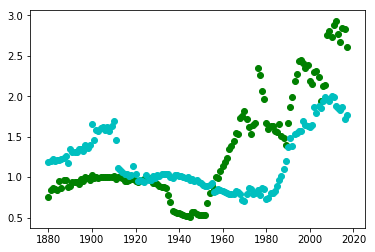

In [20]:
total_score_m_100 = []
total_score_w_100 = []
data_male = sex('M')
data_female = sex('F')


number = 100

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(men['Name'], men['Number']):
        total_score += name_dict[i]*j
        n += j
    total_score_m_100.append(total_score/n)

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(women['Name'], women['Number']):
        total_score += name_dict[i]*j
        n += j
    total_score_w_100.append(total_score/n)
   

plt.scatter((years), total_score_w_100, color='g')
plt.scatter((years), total_score_m_100, color= 'c')

A bit of a different story when we look at the top 100 names.  With men, still a big increase starting in the 1980s, but there was also a peak in the early part of the century.  With women, the encrease really started in the 1950s.

If we up the number to the top 500 of each year, we are sampling about 80% of the population born each year.

In [21]:
total_score_m_500 = []
total_score_w_500 = []
data_male = sex('M')
data_female = sex('F')


number = 500

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(men['Name'], men['Number']):
        total_score += name_dict[i]*j
        n += j
    total_score_m_500.append(total_score/n)

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(women['Name'], women['Number']):
        total_score += name_dict[i]*j
        n += j
    total_score_w_500.append(total_score/n)

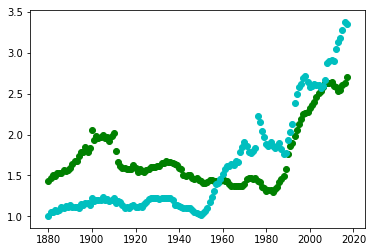

In [22]:
plt.scatter(years, total_score_m_500, color = 'g')
plt.scatter(years, total_score_w_500, color = 'c')

Trend seems pretty clear (although I'm not really quantifying how clear statistically).

The next thing to look at is if the names were androgenous is the year they were given (i.e., a name may be completly given to one gender in 1900, but to both geners in 2000).

In [23]:
male_names = sex('M', data = df)
female_names = sex('F', data = df)

def is_androgynous_year(x):
    results = {}
    for i in range(1880, 2018):
        male_occurences = name(x, year(i, male_names)).Number.sum()
        female_occurences = name(x, year(i,female_names)).Number.sum()
        total = male_occurences+female_occurences
        if total != 0:
            results[i] = (50.0-np.absolute(50-(female_occurences)/float(total)*100))
        else:
            results[i] = False
    return results


In [24]:
a = is_androgynous_year('Zachary')

In [25]:
top =all_top_names(top = 500)

name_dict_year = {}
for i in top[0]:
    name_dict_year[i] = is_androgynous_year(i)
for i in top[1]:
    name_dict_year[i] = is_androgynous_year(i)

In [35]:
score_men_year = []
score_women_year = []
data_male = sex('M')
data_female = sex('F')


number = 500

for yr in range(year_min, year_max+1):
    men = year(yr, data_male)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(men['Name'], men['Number']):
        total_score += name_dict_year[i][yr]*j
        n += j
    score_men_year.append(total_score/n)

for yr in range(year_min, year_max+1):
    women = year(yr, data_female)[0:number]

    total_score = 0.0
    n = 0.0
    for i,j in zip(women['Name'], women['Number']):
        total_score += name_dict_year[i][yr]*j
        n += j
    score_women_year.append(total_score/n)

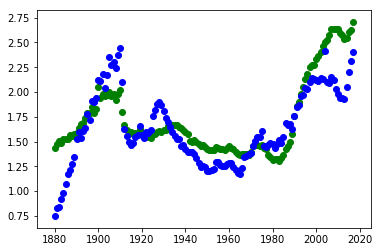

In [34]:
plt.scatter(years, total_score_m_500, color = 'g')
plt.scatter(years, score_men_year, color = 'b')

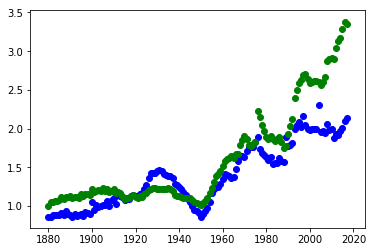

In [40]:
plt.scatter(years, score_women_year, color = 'b')
plt.scatter(years, total_score_w_500, color = 'g')

Either way, there doesnt seem to be a big change in the overall shape of the charts.  But what's intersting, is specific names often have a large change over time.

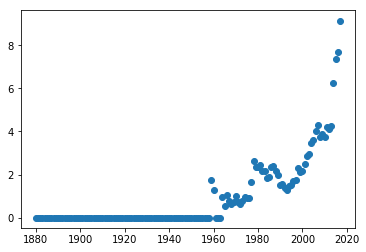

In [52]:
a = name_dict_year['Ryan']
plt.scatter(list(a.keys()), list(a.values()))

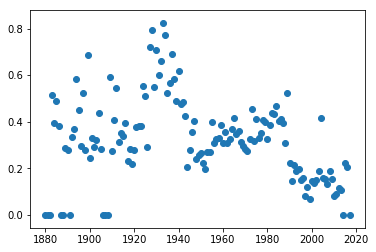

In [53]:
a = name_dict_year['Sarah']
plt.scatter(list(a.keys()), list(a.values()))

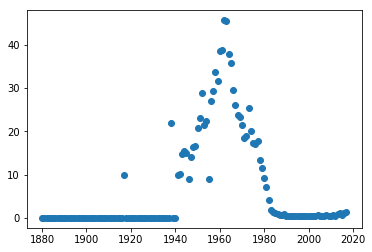

In [55]:
a = name_dict_year['Ashley']
plt.scatter(list(a.keys()), list(a.values()))

I've got to be a little bit careful in interpreting these graphs for 2 reasons:
1) may of the 0 values may be because the names didn't appear in the top 500 during certain years, so the program didn’t' process them
2) The score tells how androgynous the name is -- not which way it leans.  So this last curve ("Ashley", if I were to guess based on the fact that graph goes to 50 - that what actually happened was it was primarily a male name, and slowly became a female name (as a google search confirmed)



Either way, this was a fun little exploration.
